# Bandit tests

In [1]:
import bandits


## Arms

In [2]:
arm = bandits.DeterministicArm()
arm.sample(context=[0] * 2)


array([0.5488135, 0.5488135])

In [3]:
import scipy.stats
scipy.stats.bernoulli(0.5).rvs()

1

[0.28412682 0.57011077 0.24227026 0.41528042 0.65409829 0.01670969
 0.87765172 0.43619543 0.5752041  0.4253409 ]


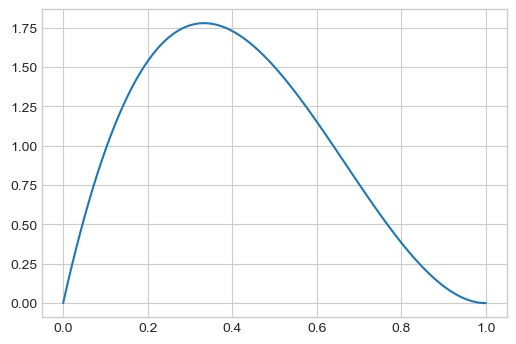

In [4]:
arm = bandits.BetaArm(2, 3)
print(arm.sample(context=[0] * 10))
fig = arm.plot_pdf()


## Policies

In [5]:
policy = bandits.ThompsonSamplingGaussian(n_arms=4, top_k=2)
display(policy)
selected_arms, selection_propensities, reward_estimates = policy.predict()
display(selected_arms, selection_propensities, reward_estimates)


Gaussian([0. 0. 0. 0.], [10. 10. 10. 10.])

[[3, 0]]

None

[array([-10.48552965, -14.20017937, -17.06270191,  19.50775395])]

In [6]:
policy = bandits.UCB(n_arms=3, top_k=2)
display(policy)
display(policy.predict())
policy.update(arms=[[0]] * 5 + [[1]] * 2, rewards=[[1]] * 5 + [[0]] * 2)
display(policy)
display(policy.predict())

policy.update(arms=[[1]] * 10 + [[0]] * 2, rewards=[[1]] * 10 + [[0]] * 2)
display(policy)
display(policy.predict())


UCB(counts:[0 0 0], reward_means[0. 0. 0.])

([[2, 1]], None, [array([0., 0., 0.])])

UCB(counts:[5 2 0], reward_means[1. 0. 0.])

([[2, 0]], None, [array([1., 0., 0.])])

UCB(counts:[ 7 12  0], reward_means[0.71428571 0.83333333 0.        ])

([[2, 0]], None, [array([0.71428571, 0.83333333, 0.        ])])

In [7]:
policy = bandits.RandomPolicy(top_k=2)
display(policy)
display(policy.predict())
policy.update(arms=[[0]] * 5 + [[1]] * 2, rewards=[[1]] * 5 + [[0]] * 2)
display(policy)
display(policy.predict())

policy.update(arms=[[1]] * 10 + [[0]] * 2, rewards=[[1]] * 10 + [[0]] * 2)
display(policy)
display(policy.predict())


([[1, 2]], None, [])

([[3, 0]], None, [])

([[2, 1]], None, [])

## Simulations

Beta-Bernoulli system

In [8]:
# create many arms
n_arms = 3
# arms = [bandits.DeterministicArm() for _idx in range(n_arms)]
arms = [bandits.BernoulliArm() for _idx in range(n_arms)]
print(arms)

# create Thompson Sampling policy
policy = bandits.ThompsonSamplingBeta(n_arms=n_arms, top_k=1)
print(policy)


[Bernoulli(0.253), Bernoulli(0.466), Bernoulli(0.244)]
Beta([1 1 1], [1 1 1])


selected_arms:
[[1], [2], [1], [2], [2], [1], [1], [0], [1], [2]]
rewards:
[[1], [0], [0], [1], [0], [0], [0], [0], [1], [0]]


Beta([1 3 2], [2 4 4])

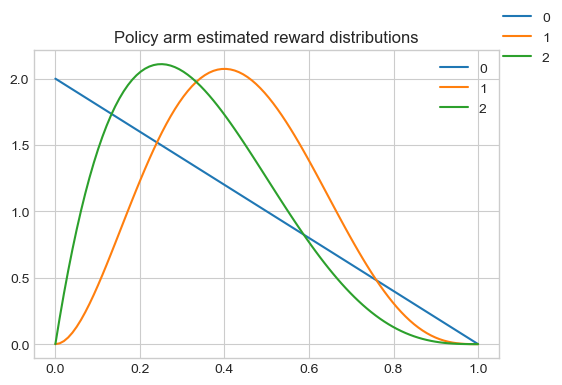

In [9]:
batch_results = bandits.simulate_batch(policy=policy, arms=arms, batch_size=10, return_regret=False)

print("selected_arms:")
print(batch_results['selected_arms'][:10])
print("rewards:")
print(batch_results['rewards'][:10])
display(policy)

fig = policy.plot_pdf()
fig.axes[0].set_title('Policy arm estimated reward distributions')
fig.legend()


Gaussian-Gaussian system

[Gaussian(0.833,5.356), Gaussian(3.175,5.899), Gaussian(-4.564,3.982)]
Gaussian([0. 0. 0.], [10. 10. 10.])


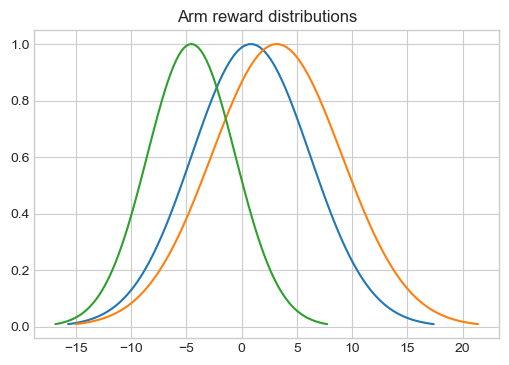

In [10]:
# create many arms
n_arms = 3
arms = [bandits.GaussianArm() for _idx in range(n_arms)]
print(arms)

if 1:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(6, 4))
    [_arm.plot_pdf(ax=ax) for _arm in arms]
    ax.set_title('Arm reward distributions')

# create Thompson Sampling policy
policy = bandits.ThompsonSamplingGaussian(n_arms=n_arms)
print(policy)


selected_arms:
[[0], [1], [2], [2], [1], [2], [2], [1], [0], [1]]
rewards:
[[-7.125621011468523], [-8.03657898163852], [-9.094191089187479], [-11.580921091883392], [1.4725400205001076], [-0.3908251802110243], [-3.5687275530819984], [3.4518512823190095], [-4.695664834809065], [5.553589743186389]]


Gaussian([-5.91064292  0.61035052 -6.15866623], [1.21497809 5.19669369 4.41570851])

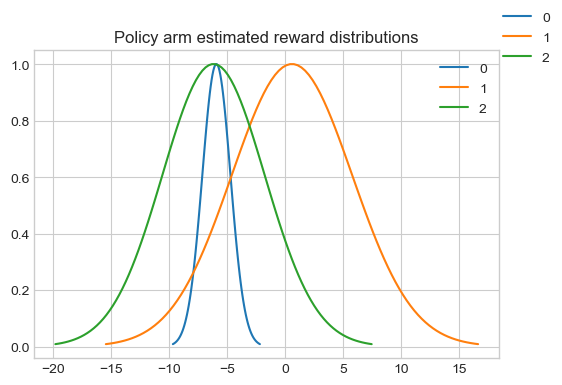

In [11]:
batch_results = bandits.simulate_batch(policy=policy, arms=arms, batch_size=10, return_regret=False)

print("selected_arms:")
print(batch_results['selected_arms'][:10])
print("rewards:")
print(batch_results['rewards'][:10])
display(policy)

fig = policy.plot_pdf()
fig.axes[0].set_title('Policy arm estimated reward distributions')
fig.legend()


Beta-Bernoulli system top 2

In [12]:
# create many arms
n_arms = 5
# arms = [bandits.DeterministicArm() for _idx in range(n_arms)]
arms = [bandits.BernoulliArm() for _idx in range(n_arms)]
print(arms)

# create Thompson Sampling policy
policy = bandits.ThompsonSamplingBeta(n_arms=n_arms, top_k=2)
print(policy)

[Bernoulli(0.396), Bernoulli(0.565), Bernoulli(0.183), Bernoulli(0.145), Bernoulli(0.488)]
Beta([1 1 1 1 1], [1 1 1 1 1])


selected_arms:
[[0, 1], [0, 2], [3, 4], [1, 3], [1, 4], [3, 2], [0, 4], [4, 2], [0, 4], [1, 4]]
rewards:
[[0, 1], [1, 0], [0, 1], [0, 0], [1, 0], [0, 1], [1, 1], [0, 1], [0, 0], [0, 0]]


Beta([3 3 3 1 3], [3 3 2 4 5])

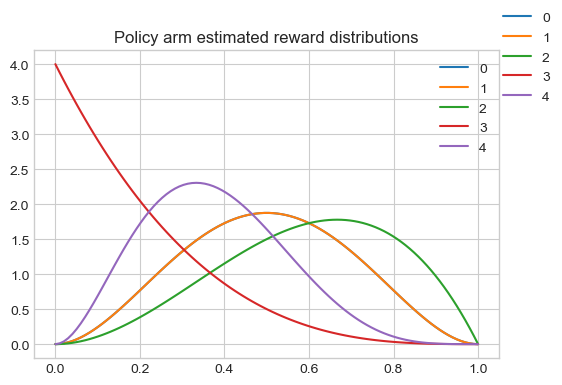

In [13]:
batch_results = bandits.simulate_batch(policy=policy, arms=arms, batch_size=10, return_regret=False)

print("selected_arms:")
print(batch_results['selected_arms'][:10])
print("rewards:")
print(batch_results['rewards'][:10])
display(policy)

fig = policy.plot_pdf()
fig.axes[0].set_title('Policy arm estimated reward distributions')
fig.legend()


Multiple batches

In [14]:
# create many arms
n_arms = 5
# arms = [bandits.DeterministicArm() for _idx in range(n_arms)]
arms = [bandits.BernoulliArm() for _idx in range(n_arms)]
print(arms)

# create Thompson Sampling policy
policy = bandits.ThompsonSamplingBeta(n_arms=n_arms, top_k=2)
print(policy)

[Bernoulli(0.690), Bernoulli(0.058), Bernoulli(0.731), Bernoulli(0.882), Bernoulli(0.272)]
Beta([1 1 1 1 1], [1 1 1 1 1])


[Gaussian(-3.420,3.791), Gaussian(6.823,2.378), Gaussian(-3.447,1.719)]
Gaussian([0. 0. 0.], [10. 10. 10.])


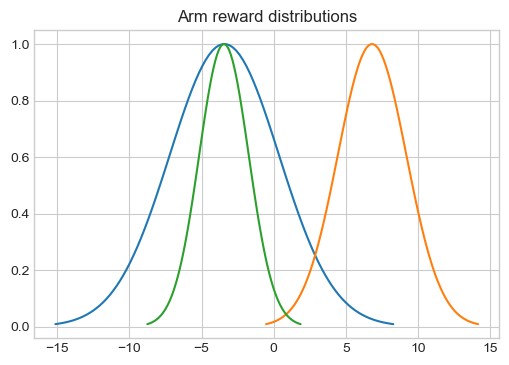

In [15]:
# create many arms
n_arms = 3
arms = [bandits.GaussianArm() for _idx in range(n_arms)]
print(arms)

if 1:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(6, 4))
    [_arm.plot_pdf(ax=ax) for _arm in arms]
    ax.set_title('Arm reward distributions')

# create Thompson Sampling policy
policy = bandits.ThompsonSamplingGaussian(n_arms=n_arms)
print(policy)


100%|██████████| 4/4 [00:00<00:00, 431.02it/s]


Gaussian([-4.5124383   5.85338011 -4.25072542], [4.96099478 2.60634123 1.53836337])

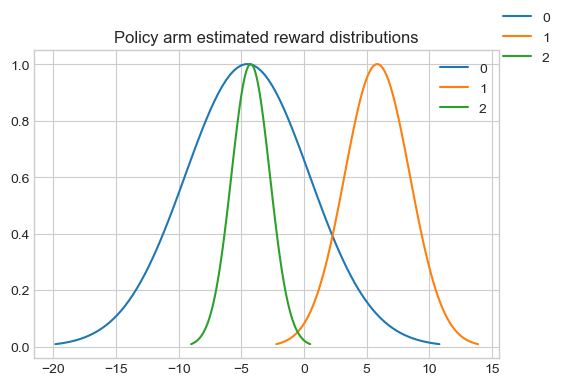

In [16]:
simulation_results = bandits.simulate_batches(policy=policy, arms=arms, n_batches=4, batch_size=10, return_regret=False)
display(policy)

fig = policy.plot_pdf()
fig.axes[0].set_title('Policy arm estimated reward distributions')
fig.legend()


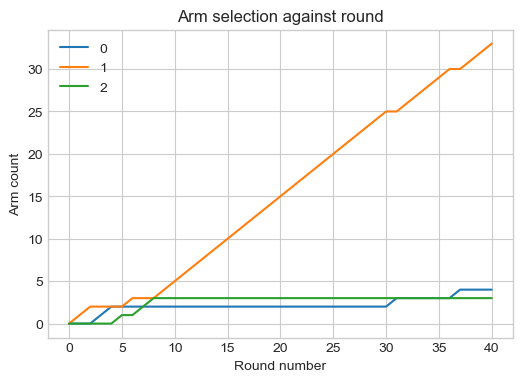

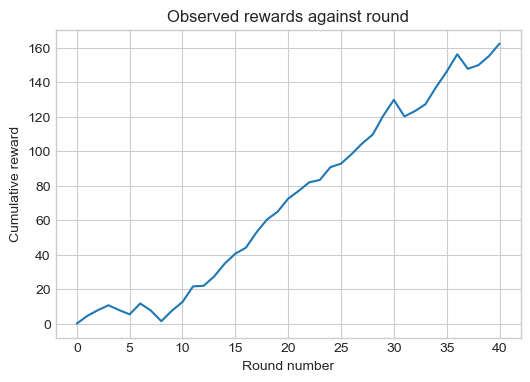

In [17]:
ax = bandits.plot_arm_selection(selected_arms=simulation_results['selected_arms'])
ax = bandits.plot_rewards(rewards=simulation_results['rewards'])

Compare different policies

[Bernoulli(0.822), Bernoulli(0.653), Bernoulli(0.726), Bernoulli(0.537), Bernoulli(0.110), Bernoulli(0.405), Bernoulli(0.405), Bernoulli(0.321), Bernoulli(0.030), Bernoulli(0.737)]


100%|██████████| 100/100 [00:00<00:00, 2379.60it/s]


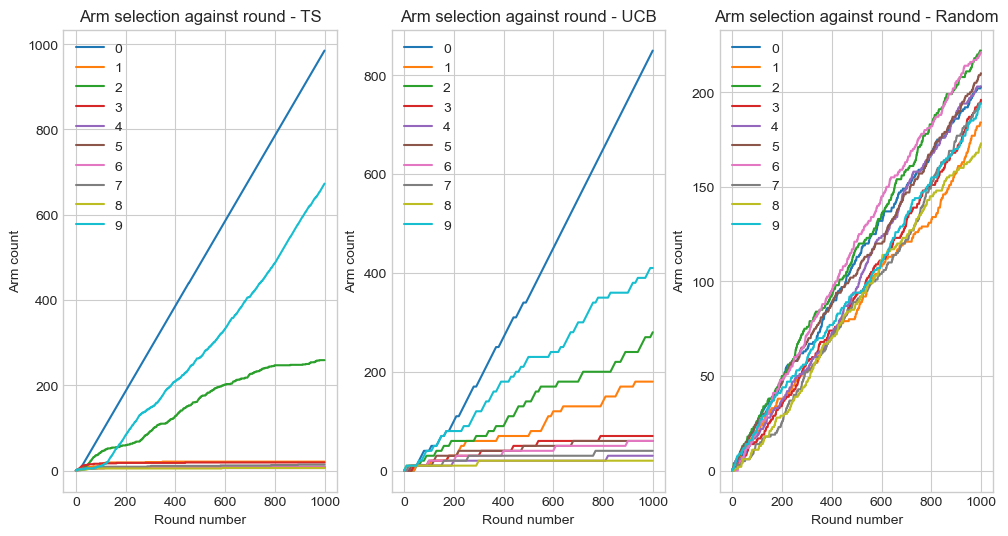

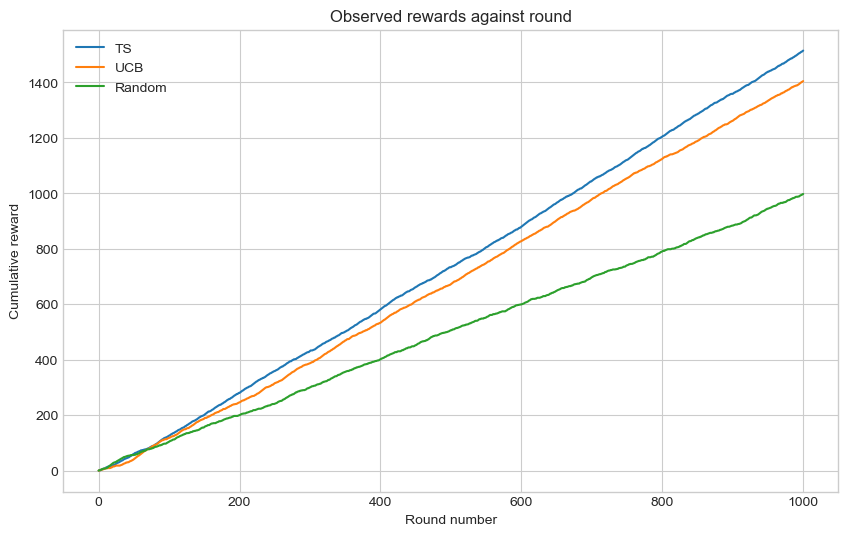

In [18]:
# create many arms
n_arms = 10
arms = [bandits.BernoulliArm() for _idx in range(n_arms)]
print(arms)

# create multiple policies
policies = {
    "TS": bandits.ThompsonSamplingBeta(n_arms=n_arms, top_k=2),
    "UCB": bandits.UCB(n_arms=n_arms, top_k=2),
    "Random": bandits.RandomPolicy(n_arms=n_arms, top_k=2),
}

simulation_results = {
    _name: bandits.simulate_batches(
        policy=_policy, arms=arms, n_batches=100, batch_size=10, return_regret=False
    )
    for _name, _policy in policies.items()
}

fig_sel, ax_sel = plt.subplots(figsize=(12, 6), ncols=len(simulation_results))
fig_rew, ax_rew = plt.subplots(figsize=(10, 6))
for _idx, (_name, _simulation_results) in enumerate(simulation_results.items()):
    bandits.plot_arm_selection(
        selected_arms=_simulation_results["selected_arms"], ax=ax_sel[_idx]
    )
    ax_sel[_idx].set_title(ax_sel[_idx].get_title() + " - " + _name)
    bandits.plot_rewards(rewards=_simulation_results["rewards"], ax=ax_rew, label=_name)
ax_rew.legend()


[Gaussian(-0.648,8.544), Gaussian(0.633,5.934), Gaussian(7.490,7.895), Gaussian(-5.822,8.402), Gaussian(3.020,5.336), Gaussian(1.718,6.254), Gaussian(-3.161,0.110), Gaussian(7.525,4.135), Gaussian(8.551,4.760), Gaussian(10.164,7.997)]


100%|██████████| 100/100 [00:00<00:00, 2677.81it/s]


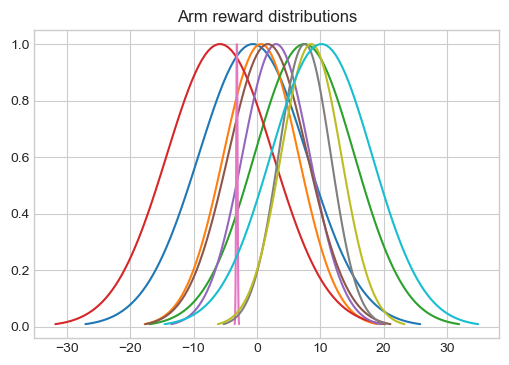

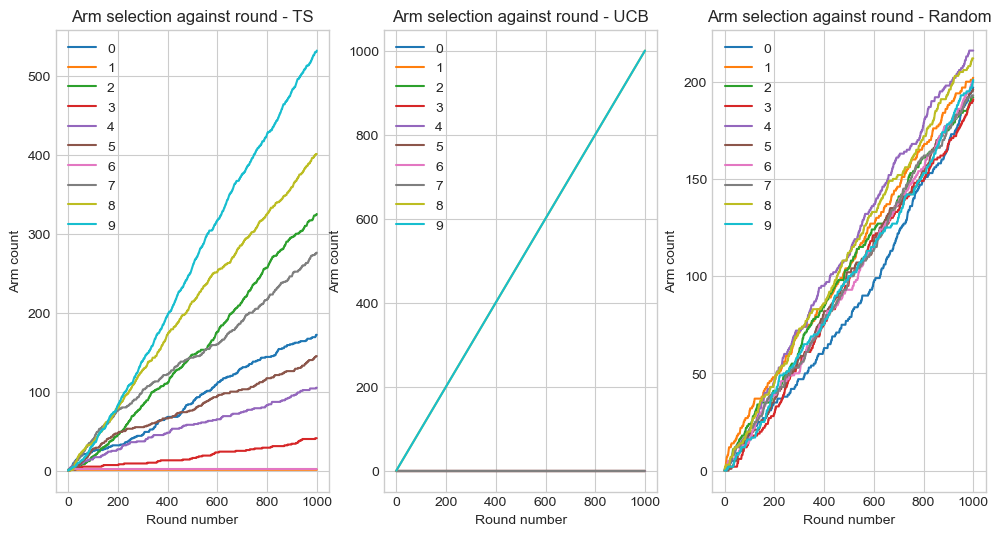

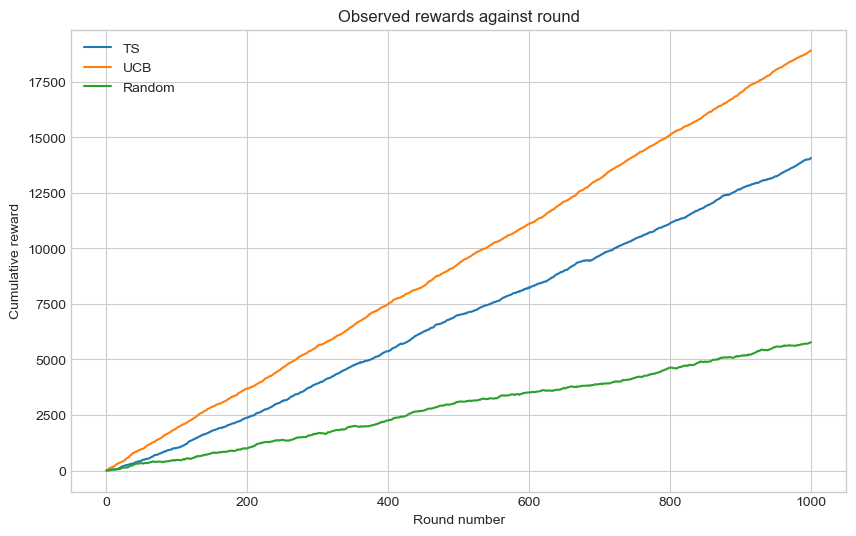

In [19]:
# create many arms
n_arms = 10
arms = [bandits.GaussianArm() for _idx in range(n_arms)]
print(arms)

if 1:
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(6, 4))
    [_arm.plot_pdf(ax=ax) for _arm in arms]
    ax.set_title("Arm reward distributions")

# create multiple policies
policies = {
    "TS": bandits.ThompsonSamplingGaussian(n_arms=n_arms, top_k=2),
    "UCB": bandits.UCB(n_arms=n_arms, top_k=2),
    "Random": bandits.RandomPolicy(n_arms=n_arms, top_k=2),
}

simulation_results = {
    _name: bandits.simulate_batches(
        policy=_policy, arms=arms, n_batches=100, batch_size=10, return_regret=False
    )
    for _name, _policy in policies.items()
}

fig_sel, ax_sel = plt.subplots(figsize=(12, 6), ncols=len(simulation_results))
fig_rew, ax_rew = plt.subplots(figsize=(10, 6))
for _idx, (_name, _simulation_results) in enumerate(simulation_results.items()):
    bandits.plot_arm_selection(
        selected_arms=_simulation_results["selected_arms"], ax=ax_sel[_idx]
    )
    ax_sel[_idx].set_title(ax_sel[_idx].get_title() + " - " + _name)
    bandits.plot_rewards(rewards=_simulation_results["rewards"], ax=ax_rew, label=_name)
ax_rew.legend()
